# Census Data Exploration

### Richard Garcia

The dataset explores monthy housing costs in the census tracts in Los Angeles. It accounts for different bins of monthy housing costs. It includes edge cases likes, No cash rent, Less than 100USD, all the way to 3000 USD or more.



Import libraries and read in the data from census reporters

In [34]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

house = gpd.read_file('acs2019_5yr_B17017_14000US06037185320.geojson')
house1 = gpd.read_file('acs2019_5yr_B25104_14000US06037185320.geojson')


understand dataset dimensions

In [105]:
house1.shape

(1004, 26)

see the top of dataset

In [106]:
house1.head()

,geoid,name,Total,Less than $100,100 to $199,200 to $299,300 to $399,400 to $499,500 to $599,600 to $699,...,"2,500 to $2,999","3,000 or more",No cash rent,geometry,p800 to $899,p900 to $999,"p1,000 to $1,499","p1,500 to $1,999","p2,000 to $2,499","p3,000 or more"
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",1575.0,0.0,13.0,20.0,59.0,25.0,0.0,19.0,...,263.0,101.0,15.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009...",0.181406,0.032250,15.238095,29.269841,18.222222,6.412698
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",1312.0,0.0,10.0,17.0,47.0,55.0,18.0,22.0,...,244.0,285.0,18.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033...",0.232377,0.052285,9.298780,11.890244,19.817073,21.722561
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",2297.0,19.0,10.0,15.0,14.0,30.0,7.0,50.0,...,122.0,51.0,69.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979...",0.079603,0.191425,35.002177,27.601219,12.973444,2.220287
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",1357.0,0.0,0.0,57.0,45.0,24.0,55.0,56.0,...,96.0,32.0,0.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859...",0.217220,0.282386,29.918939,21.886514,11.201179,2.358143
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",1445.0,8.0,9.0,18.0,76.0,24.0,69.0,83.0,...,262.0,281.0,8.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782...",0.387926,0.354402,9.550173,4.913495,14.948097,19.446367


basic utilization of the geo component of the dataset

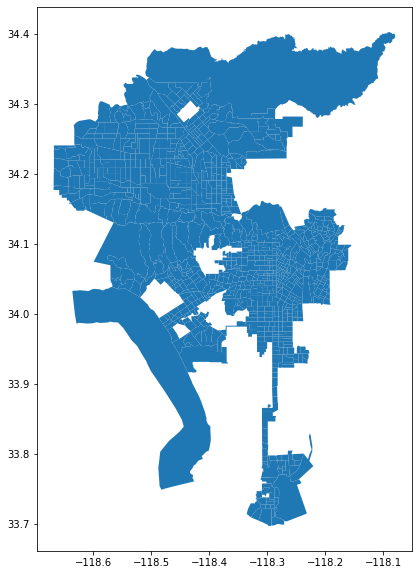

In [107]:
house1.plot(figsize = (10,10))

looking into the data types stored in the dataset

In [108]:
house1.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1004 entries, 0 to 1003
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             1004 non-null   object  
 1   name              1004 non-null   object  
 2   Total             1004 non-null   float64 
 3   Less than $100    1004 non-null   float64 
 4   100 to $199       1004 non-null   float64 
 5   200 to $299       1004 non-null   float64 
 6   300 to $399       1004 non-null   float64 
 7   400 to $499       1004 non-null   float64 
 8   500 to $599       1004 non-null   float64 
 9   600 to $699       1004 non-null   float64 
 10  700 to $799       1004 non-null   float64 
 11  800 to $899"      997 non-null    float64 
 12  900 to $999       997 non-null    float64 
 13  1,000 to $1,499   1004 non-null   float64 
 14  1,500 to $1,999   1004 non-null   float64 
 15  2,000 to $2,499   1004 non-null   float64 
 16  2,500 to $2,999 

In [109]:
house1.geoid.head()

0    14000US06037101110
1    14000US06037101122
2    14000US06037101210
3    14000US06037101220
4    14000US06037101300
Name: geoid, dtype: object

In [110]:
house1.head()

,geoid,name,Total,Less than $100,100 to $199,200 to $299,300 to $399,400 to $499,500 to $599,600 to $699,...,"2,500 to $2,999","3,000 or more",No cash rent,geometry,p800 to $899,p900 to $999,"p1,000 to $1,499","p1,500 to $1,999","p2,000 to $2,499","p3,000 or more"
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",1575.0,0.0,13.0,20.0,59.0,25.0,0.0,19.0,...,263.0,101.0,15.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009...",0.181406,0.032250,15.238095,29.269841,18.222222,6.412698
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",1312.0,0.0,10.0,17.0,47.0,55.0,18.0,22.0,...,244.0,285.0,18.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033...",0.232377,0.052285,9.298780,11.890244,19.817073,21.722561
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",2297.0,19.0,10.0,15.0,14.0,30.0,7.0,50.0,...,122.0,51.0,69.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979...",0.079603,0.191425,35.002177,27.601219,12.973444,2.220287
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",1357.0,0.0,0.0,57.0,45.0,24.0,55.0,56.0,...,96.0,32.0,0.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859...",0.217220,0.282386,29.918939,21.886514,11.201179,2.358143
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",1445.0,8.0,9.0,18.0,76.0,24.0,69.0,83.0,...,262.0,281.0,8.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782...",0.387926,0.354402,9.550173,4.913495,14.948097,19.446367


see the columns in our dataset

In [111]:
list(house1)

['geoid',
 'name',
 'Total',
 'Less than $100',
 '100 to $199',
 '200 to $299',
 '300 to $399',
 '400 to $499',
 '500 to $599',
 '600 to $699',
 '700 to $799',
 '800 to $899"',
 '900 to $999',
 '1,000 to $1,499',
 '1,500 to $1,999',
 '2,000 to $2,499',
 '2,500 to $2,999',
 '3,000 or more',
 'No cash rent',
 'geometry',
 'p800 to $899',
 'p900 to $999',
 'p1,000 to $1,499',
 'p1,500 to $1,999',
 'p2,000 to $2,499',
 'p3,000 or more']

subset desired columns

In [112]:
keepcol = ['geoid',
 'name',
 'B25104001',
 'B25104002',
 'B25104003',
 'B25104004',
 'B25104005',
 'B25104006',
 'B25104007',
 'B25104008',
 'B25104009',
 'B25104010',
 'B25104011',
 'B25104012',
 'B25104013',
 'B25104014',
 'B25104015',
 'B25104016',
 'B25104017',          
 'geometry']

In [114]:
house1 = house1[keepcol]

KeyError: "['B25104017', 'B25104014', 'B25104011', 'B25104001', 'B25104008', 'B25104012', 'B25104010', 'B25104015', 'B25104005', 'B25104004', 'B25104013', 'B25104007', 'B25104006', 'B25104016', 'B25104002', 'B25104009', 'B25104003'] not in index"

In [115]:
house1.head()

,geoid,name,Total,Less than $100,100 to $199,200 to $299,300 to $399,400 to $499,500 to $599,600 to $699,...,"2,500 to $2,999","3,000 or more",No cash rent,geometry,p800 to $899,p900 to $999,"p1,000 to $1,499","p1,500 to $1,999","p2,000 to $2,499","p3,000 or more"
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",1575.0,0.0,13.0,20.0,59.0,25.0,0.0,19.0,...,263.0,101.0,15.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009...",0.181406,0.032250,15.238095,29.269841,18.222222,6.412698
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",1312.0,0.0,10.0,17.0,47.0,55.0,18.0,22.0,...,244.0,285.0,18.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033...",0.232377,0.052285,9.298780,11.890244,19.817073,21.722561
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",2297.0,19.0,10.0,15.0,14.0,30.0,7.0,50.0,...,122.0,51.0,69.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979...",0.079603,0.191425,35.002177,27.601219,12.973444,2.220287
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",1357.0,0.0,0.0,57.0,45.0,24.0,55.0,56.0,...,96.0,32.0,0.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859...",0.217220,0.282386,29.918939,21.886514,11.201179,2.358143
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",1445.0,8.0,9.0,18.0,76.0,24.0,69.0,83.0,...,262.0,281.0,8.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782...",0.387926,0.354402,9.550173,4.913495,14.948097,19.446367


In [116]:
list(house1)

['geoid',
 'name',
 'Total',
 'Less than $100',
 '100 to $199',
 '200 to $299',
 '300 to $399',
 '400 to $499',
 '500 to $599',
 '600 to $699',
 '700 to $799',
 '800 to $899"',
 '900 to $999',
 '1,000 to $1,499',
 '1,500 to $1,999',
 '2,000 to $2,499',
 '2,500 to $2,999',
 '3,000 or more',
 'No cash rent',
 'geometry',
 'p800 to $899',
 'p900 to $999',
 'p1,000 to $1,499',
 'p1,500 to $1,999',
 'p2,000 to $2,499',
 'p3,000 or more']

In [117]:
house1.columns = ['geoid',
 'name',
 'Total',
 'Less than $100',
 '100 to $199',
 '200 to $299',
 '300 to $399',
 '400 to $499',
 '500 to $599',
 '600 to $699',
 '700 to $799',
 '800 to $899"',
 '900 to $999',
 '1,000 to $1,499',
 '1,500 to $1,999',
 '2,000 to $2,499',
 '2,500 to $2,999',
 '3,000 or more',
 'No cash rent',          
 'geometry']

ValueError: Length mismatch: Expected axis has 26 elements, new values have 20 elements

In [118]:
house1.head()

,geoid,name,Total,Less than $100,100 to $199,200 to $299,300 to $399,400 to $499,500 to $599,600 to $699,...,"2,500 to $2,999","3,000 or more",No cash rent,geometry,p800 to $899,p900 to $999,"p1,000 to $1,499","p1,500 to $1,999","p2,000 to $2,499","p3,000 or more"
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",1575.0,0.0,13.0,20.0,59.0,25.0,0.0,19.0,...,263.0,101.0,15.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009...",0.181406,0.032250,15.238095,29.269841,18.222222,6.412698
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",1312.0,0.0,10.0,17.0,47.0,55.0,18.0,22.0,...,244.0,285.0,18.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033...",0.232377,0.052285,9.298780,11.890244,19.817073,21.722561
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",2297.0,19.0,10.0,15.0,14.0,30.0,7.0,50.0,...,122.0,51.0,69.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979...",0.079603,0.191425,35.002177,27.601219,12.973444,2.220287
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",1357.0,0.0,0.0,57.0,45.0,24.0,55.0,56.0,...,96.0,32.0,0.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859...",0.217220,0.282386,29.918939,21.886514,11.201179,2.358143
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",1445.0,8.0,9.0,18.0,76.0,24.0,69.0,83.0,...,262.0,281.0,8.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782...",0.387926,0.354402,9.550173,4.913495,14.948097,19.446367


In [119]:
house1_n = house1.sample()
house1_n

,geoid,name,Total,Less than $100,100 to $199,200 to $299,300 to $399,400 to $499,500 to $599,600 to $699,...,"2,500 to $2,999","3,000 or more",No cash rent,geometry,p800 to $899,p900 to $999,"p1,000 to $1,499","p1,500 to $1,999","p2,000 to $2,499","p3,000 or more"
688,14000US06037222200,"Census Tract 2222, Los Angeles, CA",1196.0,0.0,7.0,31.0,0.0,8.0,40.0,18.0,...,15.0,100.0,0.0,"MULTIPOLYGON (((-118.30895 34.03269, -118.3078...",0.524323,0.929799,32.023411,19.314381,7.608696,8.361204


Using the total column to sort the tracts in descending order

In [120]:
house_sorted = house1.sort_values(by='Total',ascending = False)

In [121]:
house_sorted.head(10)

,geoid,name,Total,Less than $100,100 to $199,200 to $299,300 to $399,400 to $499,500 to $599,600 to $699,...,"2,500 to $2,999","3,000 or more",No cash rent,geometry,p800 to $899,p900 to $999,"p1,000 to $1,499","p1,500 to $1,999","p2,000 to $2,499","p3,000 or more"
922,14000US06037275602,"Census Tract 2756.02, Los Angeles, CA",5663.0,0.0,0.0,13.0,15.0,0.0,0.0,31.0,...,1196.0,3287.0,0.0,"MULTIPOLYGON (((-118.43226 33.97502, -118.4292...",0.002806,0.013097,2.560480,5.633057,10.224263,58.043440
546,14000US06037207900,"Census Tract 2079, Los Angeles, CA",4204.0,21.0,13.0,14.0,0.0,30.0,0.0,15.0,...,1086.0,981.0,27.0,"MULTIPOLYGON (((-118.26801 34.04065, -118.2674...",0.000000,0.006224,10.418649,4.614653,31.969553,23.334919
540,14000US06037207301,"Census Tract 2073.01, Los Angeles, CA",3608.0,136.0,57.0,393.0,131.0,124.0,142.0,159.0,...,364.0,279.0,0.0,"MULTIPOLYGON (((-118.25713 34.04302, -118.2557...",0.046859,0.010755,6.596452,18.154102,19.706208,7.732816
541,14000US06037207302,"Census Tract 2073.02, Los Angeles, CA",3401.0,217.0,75.0,249.0,29.0,119.0,74.0,84.0,...,397.0,256.0,65.0,"MULTIPOLYGON (((-118.25201 34.04483, -118.2517...",0.083861,0.240343,1.352543,15.260218,24.404587,7.527198
545,14000US06037207710,"Census Tract 2077.10, Los Angeles, CA",3259.0,0.0,0.0,188.0,28.0,113.0,26.0,35.0,...,567.0,1128.0,82.0,"MULTIPOLYGON (((-118.27275 34.04276, -118.2725...",0.088503,0.034836,5.154956,3.590058,17.950292,34.611844
929,14000US06037276603,"Census Tract 2766.03, Los Angeles, CA",3179.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,...,705.0,616.0,30.0,"MULTIPOLYGON (((-118.44226 33.95640, -118.4420...",0.079161,0.086087,5.662158,19.943378,23.309217,19.377163
842,14000US06037264301,"Census Tract 2643.01, Los Angeles, CA",3169.0,14.0,16.0,0.0,0.0,0.0,0.0,54.0,...,492.0,760.0,15.0,"MULTIPOLYGON (((-118.47001 34.05259, -118.4670...",0.000000,0.078665,6.563585,20.542758,27.295677,23.982329
343,14000US06037143300,"Census Tract 1433, Los Angeles, CA",3165.0,0.0,0.0,0.0,0.0,14.0,55.0,43.0,...,155.0,809.0,20.0,"MULTIPOLYGON (((-118.39648 34.15761, -118.3953...",0.069880,0.059897,18.262243,30.236967,12.290679,25.560821
409,14000US06037189902,"Census Tract 1899.02, Los Angeles, CA",3048.0,0.0,16.0,60.0,39.0,41.0,52.0,0.0,...,267.0,146.0,145.0,"MULTIPOLYGON (((-118.35392 34.09803, -118.3528...",0.047361,0.017222,20.341207,31.233596,19.488189,4.790026
344,14000US06037143400,"Census Tract 1434, Los Angeles, CA",3036.0,0.0,0.0,15.0,0.0,29.0,15.0,16.0,...,343.0,999.0,45.0,"MULTIPOLYGON (((-118.42250 34.15653, -118.4222...",0.091133,0.043397,13.109354,19.532279,14.690382,32.905138


I had to remove this entry, it was not a tract

In [122]:
house1 = house1.drop([1004])

KeyError: '[1004] not found in axis'

In [123]:
house_sorted = house1.sort_values(by='Total',ascending = False)
house_sorted.head(10)

,geoid,name,Total,Less than $100,100 to $199,200 to $299,300 to $399,400 to $499,500 to $599,600 to $699,...,"2,500 to $2,999","3,000 or more",No cash rent,geometry,p800 to $899,p900 to $999,"p1,000 to $1,499","p1,500 to $1,999","p2,000 to $2,499","p3,000 or more"
922,14000US06037275602,"Census Tract 2756.02, Los Angeles, CA",5663.0,0.0,0.0,13.0,15.0,0.0,0.0,31.0,...,1196.0,3287.0,0.0,"MULTIPOLYGON (((-118.43226 33.97502, -118.4292...",0.002806,0.013097,2.560480,5.633057,10.224263,58.043440
546,14000US06037207900,"Census Tract 2079, Los Angeles, CA",4204.0,21.0,13.0,14.0,0.0,30.0,0.0,15.0,...,1086.0,981.0,27.0,"MULTIPOLYGON (((-118.26801 34.04065, -118.2674...",0.000000,0.006224,10.418649,4.614653,31.969553,23.334919
540,14000US06037207301,"Census Tract 2073.01, Los Angeles, CA",3608.0,136.0,57.0,393.0,131.0,124.0,142.0,159.0,...,364.0,279.0,0.0,"MULTIPOLYGON (((-118.25713 34.04302, -118.2557...",0.046859,0.010755,6.596452,18.154102,19.706208,7.732816
541,14000US06037207302,"Census Tract 2073.02, Los Angeles, CA",3401.0,217.0,75.0,249.0,29.0,119.0,74.0,84.0,...,397.0,256.0,65.0,"MULTIPOLYGON (((-118.25201 34.04483, -118.2517...",0.083861,0.240343,1.352543,15.260218,24.404587,7.527198
545,14000US06037207710,"Census Tract 2077.10, Los Angeles, CA",3259.0,0.0,0.0,188.0,28.0,113.0,26.0,35.0,...,567.0,1128.0,82.0,"MULTIPOLYGON (((-118.27275 34.04276, -118.2725...",0.088503,0.034836,5.154956,3.590058,17.950292,34.611844
929,14000US06037276603,"Census Tract 2766.03, Los Angeles, CA",3179.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,...,705.0,616.0,30.0,"MULTIPOLYGON (((-118.44226 33.95640, -118.4420...",0.079161,0.086087,5.662158,19.943378,23.309217,19.377163
842,14000US06037264301,"Census Tract 2643.01, Los Angeles, CA",3169.0,14.0,16.0,0.0,0.0,0.0,0.0,54.0,...,492.0,760.0,15.0,"MULTIPOLYGON (((-118.47001 34.05259, -118.4670...",0.000000,0.078665,6.563585,20.542758,27.295677,23.982329
343,14000US06037143300,"Census Tract 1433, Los Angeles, CA",3165.0,0.0,0.0,0.0,0.0,14.0,55.0,43.0,...,155.0,809.0,20.0,"MULTIPOLYGON (((-118.39648 34.15761, -118.3953...",0.069880,0.059897,18.262243,30.236967,12.290679,25.560821
409,14000US06037189902,"Census Tract 1899.02, Los Angeles, CA",3048.0,0.0,16.0,60.0,39.0,41.0,52.0,0.0,...,267.0,146.0,145.0,"MULTIPOLYGON (((-118.35392 34.09803, -118.3528...",0.047361,0.017222,20.341207,31.233596,19.488189,4.790026
344,14000US06037143400,"Census Tract 1434, Los Angeles, CA",3036.0,0.0,0.0,15.0,0.0,29.0,15.0,16.0,...,343.0,999.0,45.0,"MULTIPOLYGON (((-118.42250 34.15653, -118.4222...",0.091133,0.043397,13.109354,19.532279,14.690382,32.905138


We can see the distribution of the 

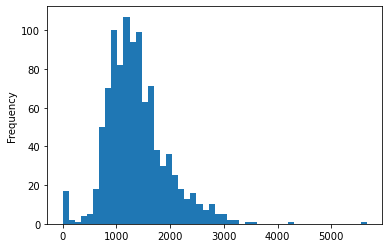

In [124]:
house1['Total'].plot.hist(bins =50)

plotting using 50-100 reults and using the geographic properties

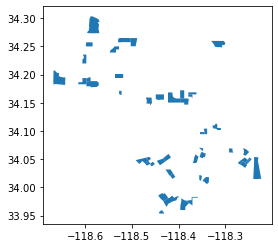

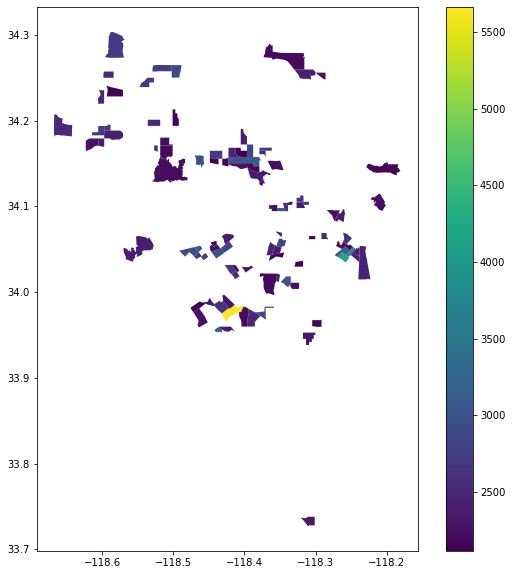

In [125]:
house_sorted.head(50).plot()
house_sorted.head(100).plot(figsize=(10,10),column='Total',legend=True)

Top 100 totals graphic geopgraphically in the $1000 to $1499 range

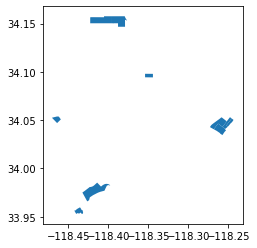

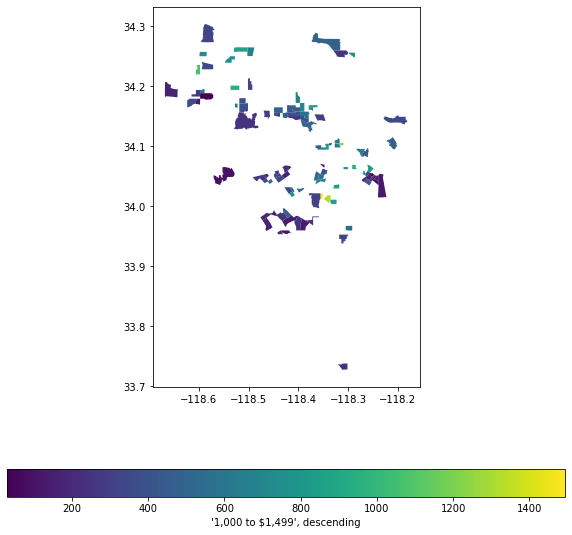

In [126]:
house_sorted = house1.sort_values(by = 'Total',ascending = False)
house_sorted[['geoid','1,000 to $1,499']].head(10)
house_sorted.head(10).plot()
house_sorted.head(100).plot(figsize=(10,10),column='1,000 to $1,499',legend=True, legend_kwds={'label': "'1,000 to $1,499', descending",
                       'orientation': "horizontal"})

Standardization to percentages

In [127]:
list(house1)

['geoid',
 'name',
 'Total',
 'Less than $100',
 '100 to $199',
 '200 to $299',
 '300 to $399',
 '400 to $499',
 '500 to $599',
 '600 to $699',
 '700 to $799',
 '800 to $899"',
 '900 to $999',
 '1,000 to $1,499',
 '1,500 to $1,999',
 '2,000 to $2,499',
 '2,500 to $2,999',
 '3,000 or more',
 'No cash rent',
 'geometry',
 'p800 to $899',
 'p900 to $999',
 'p1,000 to $1,499',
 'p1,500 to $1,999',
 'p2,000 to $2,499',
 'p3,000 or more']

In [128]:
house1['p800 to $899'] = house1['800 to $899"']/house1['Total']*100
house1['p900 to $999'] = house1['900 to $999']/house1['Total']*100
house1['p1,000 to $1,499'] = house1['1,000 to $1,499']/house1['Total']*100
house1['p1,500 to $1,999'] = house1['1,500 to $1,999']/house1['Total']*100
house1['p2,000 to $2,499'] = house1['2,000 to $2,499']/house1['Total']*100
house1['p3,000 or more'] = house1['3,000 or more']/house1['Total']*100



In [129]:
house1.sample(5)

,geoid,name,Total,Less than $100,100 to $199,200 to $299,300 to $399,400 to $499,500 to $599,600 to $699,...,"2,500 to $2,999","3,000 or more",No cash rent,geometry,p800 to $899,p900 to $999,"p1,000 to $1,499","p1,500 to $1,999","p2,000 to $2,499","p3,000 or more"
562,14000US06037208904,"Census Tract 2089.04, Los Angeles, CA",1291.0,0.0,0.0,200.0,30.0,42.0,52.0,88.0,...,0.0,0.0,9.0,"MULTIPOLYGON (((-118.27185 34.05934, -118.2713...",1.097991,0.665994,25.019365,5.886909,1.394268,0.000000
579,14000US06037211122,"Census Tract 2111.22, Los Angeles, CA",1233.0,0.0,13.0,0.0,22.0,23.0,70.0,24.0,...,66.0,46.0,0.0,"MULTIPOLYGON (((-118.29169 34.07633, -118.2905...",0.440706,0.269686,22.546634,28.548256,16.626115,3.730738
21,14000US06037104204,"Census Tract 1042.04, Los Angeles, CA",764.0,0.0,14.0,8.0,23.0,13.0,17.0,36.0,...,62.0,70.0,21.0,"MULTIPOLYGON (((-118.41142 34.28443, -118.4085...",0.445437,0.582495,26.439791,17.015707,10.732984,9.162304
363,14000US06037183222,"Census Tract 1832.22, Los Angeles, CA",1339.0,0.0,0.0,72.0,35.0,74.0,53.0,76.0,...,80.0,271.0,11.0,"MULTIPOLYGON (((-118.20472 34.12872, -118.2047...",0.055775,0.083662,17.475728,13.816281,15.160568,20.238984
106,14000US06037115201,"Census Tract 1152.01, Los Angeles, CA",2681.0,0.0,0.0,12.0,72.0,14.0,38.0,30.0,...,258.0,363.0,38.0,"MULTIPOLYGON (((-118.54741 34.23922, -118.5473...",0.059824,0.000000,28.496830,27.415144,10.966057,13.539724


Map using percentages to understanding the amount of people in each tract with spending between 1000 to 1499 USD monthy  on housing

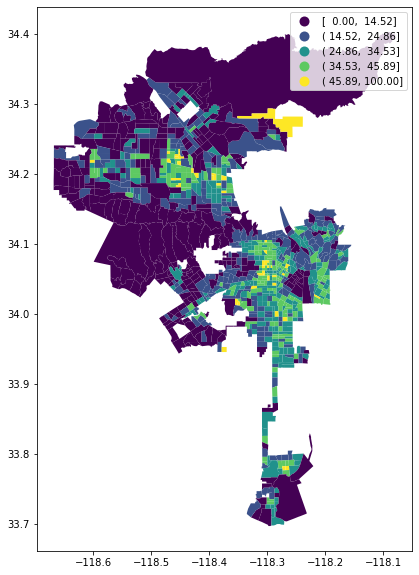

In [130]:
house1.plot(figsize=(12,10),
                 column='p1,000 to $1,499',
                 legend=True, 
                 scheme='NaturalBreaks')

Map using percentages to understanding the amount of people in each tract with spending between 1500 to 1999 USD monthy  on housing

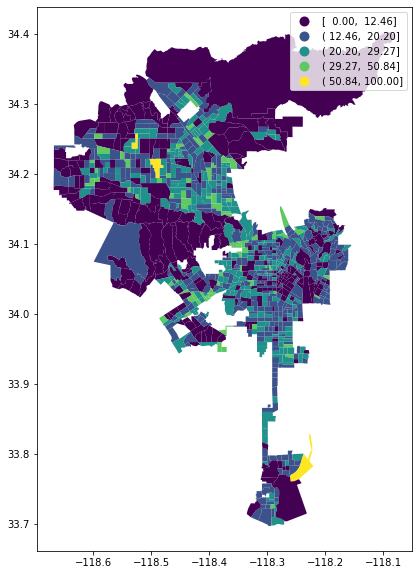

In [131]:
house1.plot(figsize=(12,10),
                 column='p1,500 to $1,999',
                 legend=True, 
                 scheme='NaturalBreaks')

Map using percentages to understanding the amount of people in each tract with spending between 2000 to 2499 USD monthy  on housing

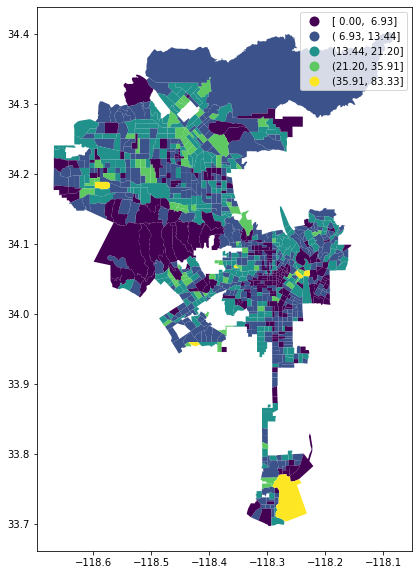

In [132]:
house1.plot(figsize=(12,10),
                 column='p2,000 to $2,499',
                 legend=True, 
                 scheme='NaturalBreaks')